In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anime
from matplotlib.animation import FuncAnimation

# 10.1 б)

Видимо, у правой части другой знак, чтобы было решение в понятном виде

$\displaystyle u_{t} = \frac{u_{xx}}{2} - \frac{4x^2}{(x^2 + t + 1)^3}, \ 0 \leq x \leq 1,\ 0<t$

$u(0, t) = \dfrac{1}{t+1}, \ u(1, t) = \dfrac{1}{t+2}, \ u(x, 0) = \dfrac{1}{x^2+1}$

Точное решение: $u(x, t) = \dfrac{1}{x^2+t+1}$

Используем явный четерехточечный шаблон:
$\dfrac{y^{n+1}_m-y^n_m}{\tau} = \dfrac{y^{n}_{m+1}-2y^n_m+y^{n}_{m-1}}{2h^2}-\dfrac{4x_m^2}{(x_m^2+t^n+1)^3}$

In [4]:
def solve(tau, h, end_t):
    x = np.linspace(0, 1, int(1/h), dtype='double')
    t = np.linspace(0, end_t, int(end_t/tau), dtype='double')

    N = len(t)
    M = len(x)

    y = np.empty([N, M], dtype='double')
    
    for i in range(M):
        y[0][i] = 1/(x[i] ** 2 + 1)

    for i in range(N):
        y[i][0] = 1/(t[i]+1)
        y[i][M-1] = 1/( t[i] + 2)

    for n in range(0, N-1):
        for m in range(1, M-1):
            y[n+1][m] = y[n][m] + tau / (2 * h **2) * (y[n][m+1]-2*y[n][m]+y[n][m-1]) - (tau * 4 * x[m]**2)/(x[m] ** 2 + t[n]+1)**3 

    return y, x, t, N, M

In [5]:
def real_sol(x, t):
    return 1/(x**2 + t + 1)

In [6]:
def plot_n(n, y, x, t):
    plt.clf()
    plt.ylim([0.3, 1])
    plt.title(f"График функции при t = {t[n]:.3f}")
    plt.xlabel("x")
    plt.ylabel("u")
    
    plt.plot(x, y[n], label='решение разностной задачи')
    plt.plot(x, real_sol(x, t[n]), label='решение диф.уравнения')
    plt.legend()
    
    return plt

Параметры сетки для точности 1e-4 ?

Условие устойчивости $2 \tau < h^2$

Невязка $r = u''_{tt}\frac{\tau}{2} + u^{(4)}_x \frac{h^2}{4!}$

Оценим из краевых условий $\max u''_{tt} = 2 , \max u^{(4)}_x = 24$

Тогда $\tau$ = 5e-5, h = 1e-2

In [8]:
y, x, t, N, M = solve(5e-5, 1e-2, 0.5)

<IPython.core.display.Javascript object>


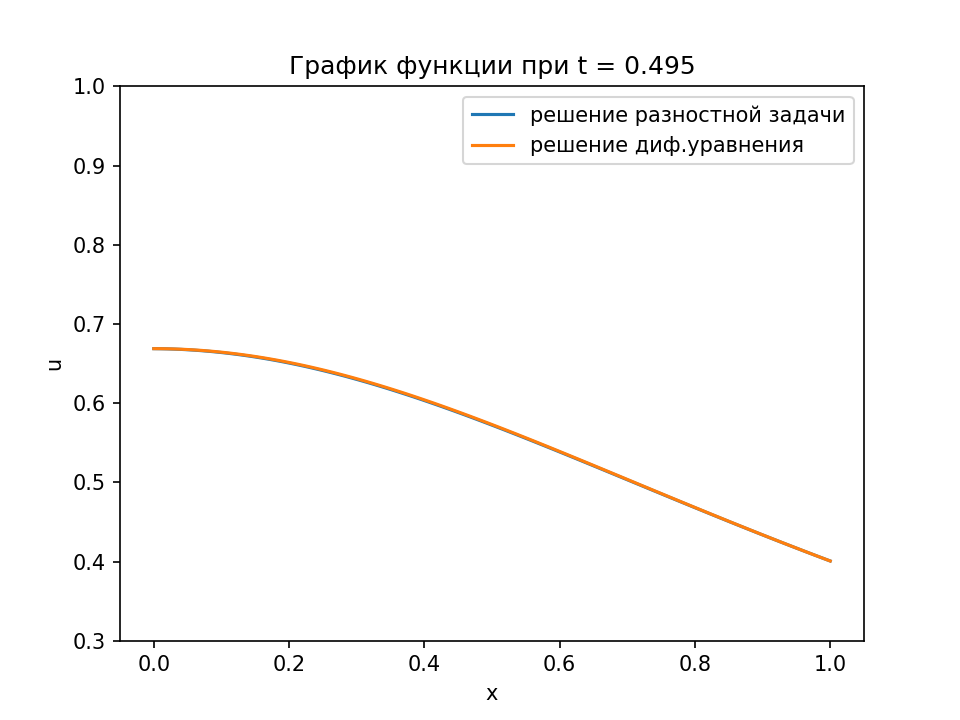

In [30]:
%matplotlib notebook

num_frames = 100

def animate(n):
    n = int(n / num_frames * N)
    plot_n(n, y, x, t)
    
anim = anime.FuncAnimation(plt.figure(), animate, interval=50, frames = num_frames, repeat = False)
plt.show()

Максимальная ошибка:

In [26]:
err = np.empty_like(y)

for i in range(len(y)):
    for j in range(len(y[0])):
        err[i][j] = y[i][j] - real_sol(x[j],t[i])
        
print(np.amax(err))

0.00011570362170143511
